Accuracy: 0.9994382811402893
Precision: 0.8181818181818182
Recall: 0.8181818181818182
F1-Score: 0.8181818181818182
Matthews Correlation Coefficient: 0.8179005242296381


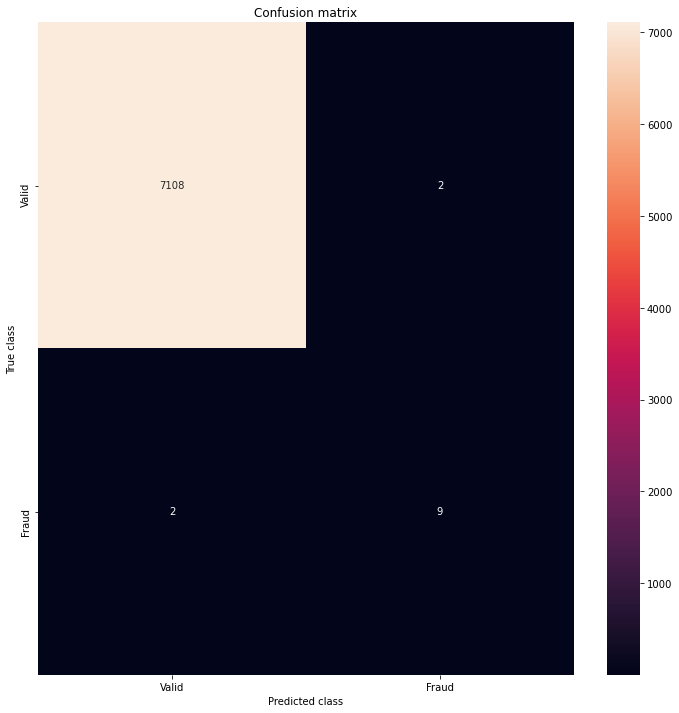

In [14]:
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
from Resampling import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

"""
Supervised machine learning algorithms do not need to be separated from the class label,
but instead will use the class label algorithm to train the dataset first. The data has already been split
into training and testing sets in the resampling.py file

The first supervised algorithm I will run is random forest.

"""
#Building a model


# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
# predictions
y_pred = rfc.predict(X_test)

n_outliers = len(fraud)
n_errors = (y_pred != y_test).sum()
acc= accuracy_score(y_test,y_pred)
prec= precision_score(y_test,y_pred)
rec= recall_score(y_test,y_pred)
f1= f1_score(y_test,y_pred)
MCC=matthews_corrcoef(y_test,y_pred)

print("Accuracy: " + str(acc))
print("Precision: " + str(prec))
print("Recall: " + str(rec))
print("F1-Score: " + str(f1))
print("Matthews Correlation Coefficient: " + str(MCC))

"""
As seen, the precision and recall are both around .81, which is much higher than the isolation forest 
model which was unsupervised.

We can also create a confusion matrix to visualiaze the results, which is essentially a 4-part diagram which displays
true positives, false positives, true negatives, and false negatives in its 4 columns. 
"""
LABELS = ['Valid', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_pred)

# Using the matplotlib pyplot library, the confusion matrix can be visually represented with a heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel("True class")
plt.xlabel("Predicted class")
plt.show()

"""
As seen in the confusion matrix, there are 7108 true positives, 2 false positives, 9 true negatives,
and 2 false negatives. 
"""


In [32]:
"""
The next supervised algorithm I will try to use is the multivariate Gaussian distribution algorithm. This is by far 
the most complicated out of all of the algorithms used so far. To pre process the data for this algorithm, the "Time" 
and "Amount" classes will also be dropped since this algorithm is very sensitive to distance metrics (if the ranges of 
the different features are misaligned, the accuracy of the algorithm will decrease). The dataframe 'data' used here
has already dropped the time and amount features.

The first step of the algorithm is to calculate the mean value of each feature. Since each feature is 
approximately normal, around 60% of the transactions will be within one standard deviation of the mean.

The next step is to calculate the covariance matrix on the training set. Next, calculate the multivariate
normal pdf on the training set. 

Calculate the same PDF on the validation set (~50% of fraudulent transactions and ~20% normal ones) and also
the test set. Determine a threshold which separates outliers (fraudulent) from non-outliers (valid)

Calculate outliers in the test set which are the sum of the PDF values that are smaller than the determined threshold


"""
data = pd.read_csv('creditcard.csv')
data = data.sample(frac=0.1)

# Split the original data into training, testing, and validation sets
def train_validation_splits(df):
    # Fraud Transactions
    fraud = df[df['Class'] == 1]
    # Normal Transactions
    normal = df[df['Class'] == 0]
    print('normal:', normal.shape[0])
    print('fraud:', fraud.shape[0])
    normal_test_start = int(normal.shape[0] * .2)
    fraud_test_start = int(fraud.shape[0] * .5)
    normal_train_start = normal_test_start * 2
    val_normal = normal[:normal_test_start]
    val_fraud = fraud[:fraud_test_start]
    validation_set = pd.concat([val_normal, val_fraud], axis=0)
    test_normal = normal[normal_test_start:normal_train_start]
    test_fraud = fraud[fraud_test_start:fraud.shape[0]]
    test_set = pd.concat([test_normal, test_fraud], axis=0)
    Xval = validation_set.iloc[:, :-1]
    Yval = validation_set.iloc[:, -1]
    Xtest = test_set.iloc[:, :-1]
    Ytest = test_set.iloc[:, -1]
    train_set = normal[normal_train_start:normal.shape[0]]
    Xtrain = train_set.iloc[:, :-1]
    return Xtrain.to_numpy(), Xtest.to_numpy(), Xval.to_numpy(), Ytest.to_numpy(), Yval.to_numpy()



,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
258154,1.895780,-1.567294,0.860830,0.151899,-2.057621,0.715390,-1.894239,0.323064,1.343149,0.405446,...,-0.674625,-0.441793,-0.233572,0.274168,0.286097,1.226307,-0.515663,0.673976,0.061502,-0.010308
70298,-1.390429,-0.942390,1.898071,0.361034,1.290499,0.958564,-0.916249,0.888276,0.667169,-0.763567,...,-2.557313,-0.067263,0.489028,1.230545,0.334041,-1.001353,-0.890552,-0.404480,0.242647,0.211608
227677,0.023166,0.874695,0.203670,-0.784804,0.717656,-0.603473,0.954665,-0.092693,-0.424655,-0.266907,...,0.320241,0.040718,-0.219615,-0.440162,0.002560,-0.316633,-0.445132,0.137533,0.249657,0.086024
128417,1.227406,-0.624309,0.154301,-0.376228,-0.893097,-0.755187,-0.181756,-0.223730,-0.907857,0.537021,...,-0.966962,-0.392486,-0.359073,-0.500255,0.007294,0.463938,0.312699,1.093692,-0.059484,0.009043
227267,-0.795843,-0.045877,-0.789747,0.432049,0.778602,4.688147,-1.813848,2.047509,0.125861,-0.185463,...,1.918789,0.134883,0.519562,1.279315,0.271045,0.784797,-1.871832,0.575462,0.082396,0.065257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157040,-4.695312,4.963889,-3.506595,-1.510271,-0.719811,-2.153887,0.141726,1.183404,2.923571,2.851435,...,-0.790567,1.356380,-0.167691,0.506259,0.135779,-0.001349,0.473490,0.048832,0.742865,0.349941
207888,-1.559246,1.456075,0.580449,-1.328188,1.088907,-0.374774,1.317426,-0.209186,0.042816,-0.197433,...,-0.367778,0.073306,-0.392502,-1.045885,-0.221248,0.568308,0.568975,0.137458,-0.406874,-0.037074
271156,-2.138527,2.541139,-1.444500,-1.080604,0.333138,-0.655125,0.655274,0.354301,1.374130,1.990874,...,-0.294097,1.005657,-0.595866,-0.831369,0.178913,0.558920,-0.114777,0.048602,0.305936,-0.194369
279848,-3.199696,1.922122,-4.350878,-1.388138,1.683183,2.604417,-1.375415,3.049083,-1.263205,-1.118432,...,-0.142961,-0.855404,0.384625,0.296170,-0.236693,0.803561,0.494982,0.678102,-1.066348,-0.551563
